In [1]:
%matplotlib inline

import numpy as np
from scipy.misc import logsumexp
from matplotlib import pyplot as pl

In [2]:
f = 4.23
phi0 = 0.

def signal(f0, phi0, ts, t0):
    return np.sin(2.*np.pi*f0*(ts-t0) + phi0)

def logtrapz(lys, xvs):
    deltas = np.log(np.diff(xvs))
    return -np.log(2.) + logsumexp([logsumexp(lys[:-1]+deltas), logsumexp(lys[1:]+deltas)])

ts = np.linspace(0., 1, 100.)

sig = signal(f, phi0, ts, ts[0])

In [4]:
sigmas = np.logspace(-1., 1., 400)

snrs = []
for sigma in sigmas:
    snrs.append(np.sqrt(np.sum(sig**2)/sigma**2))

Zs = []
Zn = []
Zn1 = []
Zn2 = []
Zs1 = []
Zs2 = []
Bcoh = []
Bincoh = []
Bincoh2 = []

phis = np.linspace(0., 2.*np.pi, 500)
posts = np.zeros(len(phis))
posts1 = np.zeros(len(phis))
posts2 = np.zeros(len(phis))

for sigma in sigmas:
    noise = np.random.randn(len(ts))*sigma
    data1 = sig + noise

    for i, phi in enumerate(phis):
        posts[i] = -0.5*len(sig)*np.log(2.*np.pi*sigma**2) - np.sum(0.5*(data1-signal(f, phi, ts, ts[0]))**2/sigma**2)
    posts -= np.log(2.*np.pi) # mulitply by prior

    # marginalise to get evidence
    Zs.append(logtrapz(posts, phis))

    # get noise evidence
    Zn.append(-0.5*len(sig)*np.log(2.*np.pi*sigma**2) - np.sum(0.5*data1**2/sigma**2))

    for i, phi in enumerate(phis):
        posts1[i] = -0.5*(len(sig)/2.)*np.log(2.*np.pi*sigma**2) - np.sum(0.5*(data1[0:50]-signal(f, phi, ts[0:50], ts[0]))**2/sigma**2)
    posts1 -= np.log(2.*np.pi) # mulitply by prior
    Zs1.append(logtrapz(posts1, phis))

    Zn1.append(-0.5*(len(sig)/2.)*np.log(2.*np.pi*sigma**2) - np.sum(0.5*data1[0:50]**2/sigma**2))

    for i, phi in enumerate(phis):
        posts2[i] = -0.5*(len(sig)/2.)*np.log(2.*np.pi*sigma**2) - np.sum(0.5*(data1[50:]-signal(f, phi, ts[50:], ts[0]))**2/sigma**2)
    posts2 -= np.log(2.*np.pi) # mulitply by prior
    Zs2.append(logtrapz(posts2, phis))

    Zn2.append(-0.5*(len(sig)/2.)*np.log(2.*np.pi*sigma**2) - np.sum(0.5*data1[50:]**2/sigma**2))
    
    Bcoh.append(Zs[-1] - Zn[-1])
    Bincoht = Zs[-1] - np.logaddexp(Zn[-1], np.logaddexp(Zs1[-1]+Zs2[-1], np.logaddexp(Zs1[-1]+Zn2[-1], Zn1[-1]+Zs2[-1])))
    Bincoh.append(Bincoht)
    
    Bincoh2.append(Zs[-1] - (Zs1[-1]+Zs2[-1]))


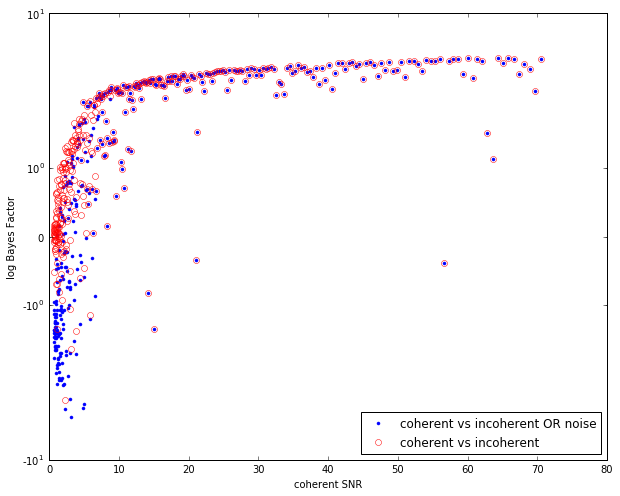

In [93]:
fig, ax = pl.subplots(figsize=(10,8))
ax.plot(snrs, Bincoh, 'b.', label='coherent vs incoherent OR noise')
ax.plot(snrs, Bincoh2, 'ro', markerfacecolor='none', markeredgecolor='r', label='coherent vs incoherent')
ax.set_yscale('symlog')
ax.set_xlabel('coherent SNR')
ax.set_ylabel('log Bayes Factor')
ax.legend(loc='lower right', numpoints=1);

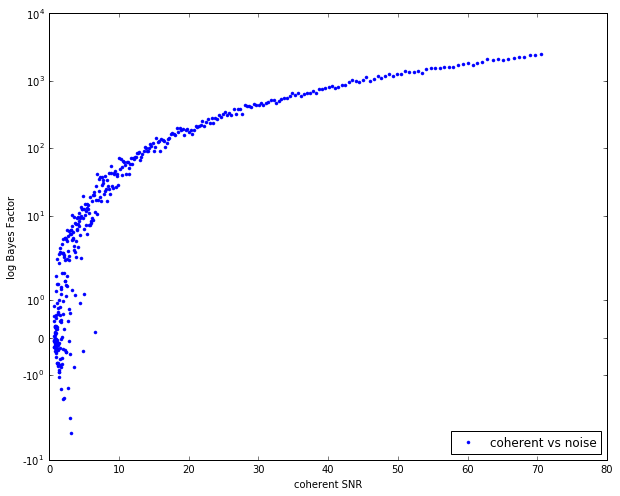

In [94]:
fig1, ax1 = pl.subplots(figsize=(10,8))
ax1.plot(snrs, Bcoh, 'b.', label='coherent vs noise')
ax1.set_yscale('symlog')
ax1.set_xlabel('coherent SNR')
ax1.set_ylabel('log Bayes Factor')
ax1.legend(loc='lower right', numpoints=1);